In [1]:
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 3D dimensions.
Computational cell is 10 x 12 x 10 with resolution 20
time for set_epsilon = 7.02164 s


/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/visualization.py:1402: UserWarning: Warning: The 'sim' argument in Animate2D is deprecated and has no effect. It will be removed in a future release.
  warnings.warn(


-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=10.0)

Meep progress: 0.025/10.0 = 0.2% done in 4.4s, 1756.3s to go
on time step 1 (time=0.025), 4.40044 s/step
Meep progress: 0.5750000000000001/10.0 = 5.8% done in 8.5s, 138.9s to go
on time step 23 (time=0.575), 0.185194 s/step
Meep progress: 1.1/10.0 = 11.0% done in 12.6s, 101.7s to go
on time step 44 (time=1.1), 0.195141 s/step
Meep progress: 1.625/10.0 = 16.2% done in 16.7s, 86.3s to go
on time step 65 (time=1.625), 0.198178 s/step
Meep progress: 2.15/10.0 = 21.5% done in 20.9s, 76.3s to go
on time step 86 (time=2.15), 0.198694 s/step
Meep progress: 2.7/10.0 = 27.0% done in 25.0s, 67.6s to go
on time step 108 (time=2.7), 0.185617 s/step
Meep progress: 3.25/10.0 = 32.5% done in 29.1s, 60.4s to go
on time step 130 (time=3.25), 0.185353 s/step
Meep progress: 3.7750000000000004/10.0 = 37.8% done in 33.2s, 54.7s to go
on time step 151 (time=3.775), 0.19481 s/step
Meep progress: 4.3/10.0 = 43.0% done in 37.2s, 49.3s to go
on time step 172 (time=4.3), 0.191634 s/step
Meep progress: 4.825/10.0 

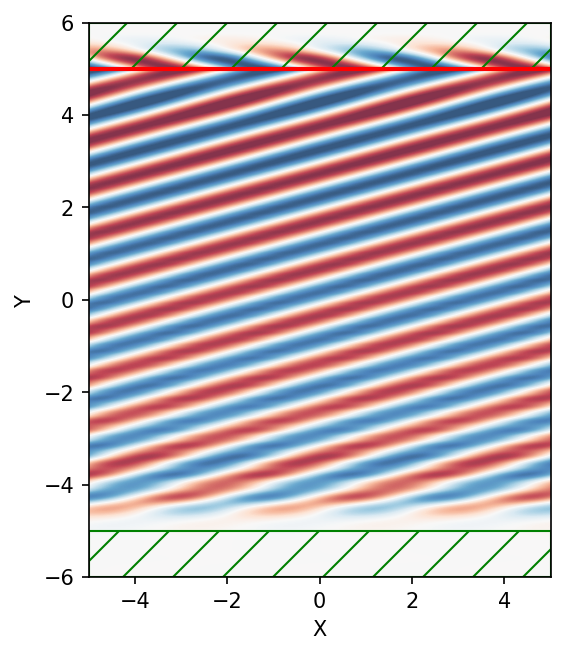

In [2]:
# 3D simulation, planewave in y direction, E field in x direction, 15-degree tilt (from vertical)
theta_src=math.radians(15)

wvl = 1
fcen = 1/wvl

resolution = 20/wvl

s = 10 * wvl
dpml = 1 * wvl  # thickness of PML layers

sx = s
sy = s + 2*dpml
sz = s
cell = mp.Vector3(sx, sy, sz)

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y)]

def pw_amp(k,x0):
    def _pw_amp(x):
        return cmath.exp(1j*2*math.pi*k.dot(x+x0))
    return _pw_amp

k = mp.Vector3(math.sin(theta_src), math.cos(theta_src), 0).scale(fcen)
if theta_src == 0:
    k = mp.Vector3(0,0,0)

src_pt = mp.Vector3(y=0.5*sy-dpml)

sources = [mp.Source(mp.ContinuousSource(fcen, fwidth=0.02*fcen),
                     component=mp.Ex,
                     center=src_pt,
                     size=mp.Vector3(x=sx, z=sz),
                     amp_func=pw_amp(k, src_pt))]

sim = mp.Simulation(cell_size=cell,
                    sources=sources,
                    k_point=k,
                    boundary_layers=pml_layers,
                    resolution=resolution)

t = 10  # run time
f = plt.figure(dpi=150)
volume = mp.Block(size=mp.Vector3(sx,sy,0), center=mp.Vector3(z=int(sz/2)))
Animate = mp.Animate2D(sim, output_plane=volume, fields=mp.Ex, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.1, Animate), until=t)

filename = "test.mp4"
Animate.to_mp4(10,filename)
Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 7.98702e-05 s
Working in 2D dimensions.
Computational cell is 13 x 13 x 0 with resolution 10
time for set_epsilon = 0.00946999 s
-----------


/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/visualization.py:1402: UserWarning: Warning: The 'sim' argument in Animate2D is deprecated and has no effect. It will be removed in a future release.
  warnings.warn(


FloatProgress(value=0.0, description='0% done ', max=400.0)

Normalizing field data...
run 0 finished at t = 400.0 (8000 timesteps)
Generating MP4...


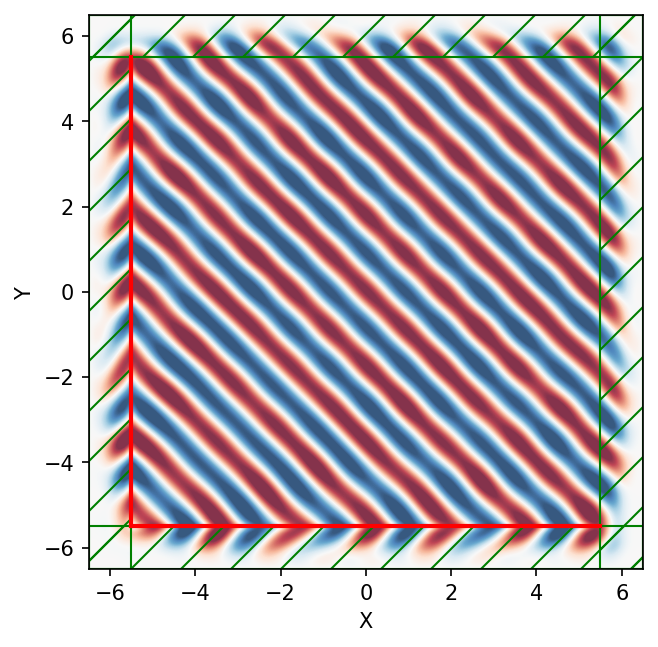

In [3]:
# This example creates an approximate Ez-polarized planewave in vacuum (2D simulation with PML)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, 0)

pml_layers = [mp.PML(dpml)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1 # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * s, 0),
        size=mp.Vector3(0, s),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s))
    ),
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s),
        size=mp.Vector3(s, 0),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle2D.mp4"
Animate.to_mp4(5,filename)
Video(filename)